# VacationPy
To Import Libraries and Load the Weather and Coordinates Data

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from pprint import pprint

# Import API key
from api_keys import geoapify_key
gmaps.configure(api_key= geoapify_key)

In [7]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,bredasdorp,-34.5322,20.0403,17.01,65,100,1.18,ZA,1681934069
1,1,tiksi,71.6872,128.8694,-23.03,100,100,1.45,RU,1681933995
2,2,puno,-15.8333,-70.0333,13.95,33,41,4.59,PE,1681934072
3,3,waitangi,-43.9535,-176.5597,16.57,92,100,4.02,NZ,1681934073
4,4,puerto natales,-51.7236,-72.4875,13.25,50,75,14.40,CL,1681934073


In [15]:
city_data_df.columns

Index(['City_ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

# Step 1: Create a map that displays a point for every city in the city_data_df DataFrame. The size of the point should be the humidity in each city.¶

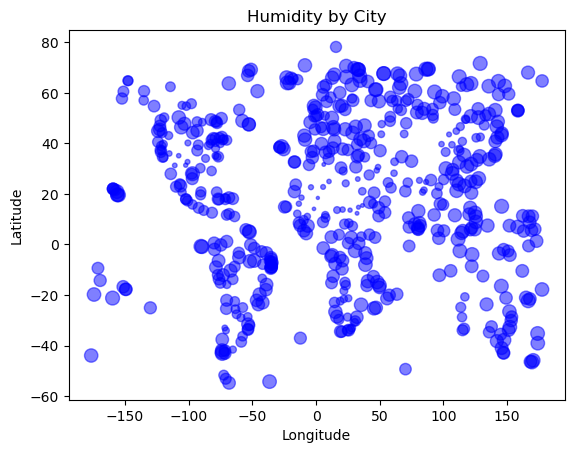

In [8]:
#Extract humidity values
humidity = city_data_df['Humidity'].tolist()

# Extract longitude and latitude values
lat = city_data_df['Lat'].tolist()
lng = city_data_df['Lng'].tolist()

#Create a scatter plot
plt.scatter(lng, lat, s=humidity, c='blue', alpha=0.5)

#Add x and y labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#Add title
plt.title('Humidity by City')

#Show plot
plt.show()

# Step 2: Narrow down the city_data_df DataFrame to find your ideal weather condition

In [21]:
# Filter vacation with zero cloudiness
vacation_no_cloud = city_data_df[city_data_df["Cloudiness"] == 0]
# Filter vacation with max temp above 21 degrees C
vacation_above_21_degrees = vacation_no_cloud[vacation_no_cloud["Max Temp"] > 21]
# Filter vacation with max temp below 27 degrees c
vacation_below_27_degrees = vacation_above_21_degrees[vacation_above_21_degrees["Max Temp"] < 27]
# Filter vacation with wind speed below 4.5 m/s
final_vacation_df = vacation_below_27_degrees[vacation_below_27_degrees["Wind Speed"] < 4.5]

# Set Index
indexed_final_vacation_df = final_vacation_df.reset_index()
del indexed_final_vacation_df["index"]
indexed_final_vacation_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,12,nogales,31.3086,-110.9422,24.62,11,0,4.12,MX,1681934077
1,115,port elizabeth,-33.9180,25.5701,22.95,71,0,3.09,ZA,1681934128
2,149,gebeit,21.0667,36.3167,24.74,29,0,2.00,SD,1681934144
3,270,graneros,-34.0667,-70.7333,24.10,23,0,3.60,CL,1681934205
4,290,ha'il,27.5219,41.6907,23.01,53,0,3.09,SA,1681934196


# Step 3: Create a new DataFrame called hotel_df.

In [23]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = pd.DataFrame(city_data_df, columns=["City", "Country", "Lat", "Lng", "Humidity"])

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""
# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
0,bredasdorp,ZA,-34.5322,20.0403,65,
1,tiksi,RU,71.6872,128.8694,100,
2,puno,PE,-15.8333,-70.0333,33,
3,waitangi,NZ,-43.9535,-176.5597,92,
4,puerto natales,CL,-51.7236,-72.4875,50,


# Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [67]:
# Set parameters to search for a hotel
radius = 10000
params = {
    "categories":'accommodation.hotel',
     "limit":20,
     "apiKey": geoapify_key}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get lat, lng from df
    lat = row["Lat"]
    lng = row["Lng"]
    
    # Get latitude and longitude from DataFrame.
    params["location"] = f"{lat},{lng}"

     
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = { "lat": lat, "lng": lng }
    params["bias"] = { "lat": lat, "lng": lng }
    
   # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make request and retrieve the JSON data from the search. 
    hotel = requests.get(base_url, params=params).json()
  
    # Get the first hotel from the results and store the name, if a hotel isn't found skip the city.
    
    try:
        hotel_df.loc[index, "Hotel Name"] = hotel["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")
    
    # Display sample data
hotel_df

Starting hotel search
bredasdorp - nearest hotel: No hotel found
tiksi - nearest hotel: No hotel found
puno - nearest hotel: No hotel found
waitangi - nearest hotel: No hotel found
puerto natales - nearest hotel: No hotel found
bilibino - nearest hotel: No hotel found
iqaluit - nearest hotel: No hotel found
port isabel - nearest hotel: No hotel found
adamstown - nearest hotel: No hotel found
katra - nearest hotel: No hotel found
antsohihy - nearest hotel: No hotel found
albany - nearest hotel: No hotel found
nogales - nearest hotel: No hotel found
port-aux-francais - nearest hotel: No hotel found
mirny - nearest hotel: No hotel found
kailua-kona - nearest hotel: No hotel found
longyearbyen - nearest hotel: No hotel found
mawu - nearest hotel: No hotel found
anadyr - nearest hotel: No hotel found
keflavik - nearest hotel: No hotel found
marabba - nearest hotel: No hotel found
scarborough - nearest hotel: No hotel found
zeya - nearest hotel: No hotel found
as sulayyil - nearest hotel: No

strezhevoy - nearest hotel: No hotel found
mitu - nearest hotel: No hotel found
kodinsk - nearest hotel: No hotel found
vikulovo - nearest hotel: No hotel found
nizhnyaya poyma - nearest hotel: No hotel found
santa cruz del sur - nearest hotel: No hotel found
wewak - nearest hotel: No hotel found
benjamin aceval - nearest hotel: No hotel found
kapa'a - nearest hotel: No hotel found
esmeraldas - nearest hotel: No hotel found
san luis de la loma - nearest hotel: No hotel found
celestun - nearest hotel: No hotel found
whitehorse - nearest hotel: No hotel found
invercargill - nearest hotel: No hotel found
melekeok village - nearest hotel: No hotel found
lompoc - nearest hotel: No hotel found
smithers - nearest hotel: No hotel found
tarabha - nearest hotel: No hotel found
bosaso - nearest hotel: No hotel found
kyosai - nearest hotel: No hotel found
ngara - nearest hotel: No hotel found
ilulissat - nearest hotel: No hotel found
dudinka - nearest hotel: No hotel found
rockport - nearest hotel

helong - nearest hotel: No hotel found
taipei - nearest hotel: No hotel found
kristiansund - nearest hotel: No hotel found
bamboo flat - nearest hotel: No hotel found
barcelos - nearest hotel: No hotel found
xining - nearest hotel: No hotel found
nerja - nearest hotel: No hotel found
la passe - nearest hotel: No hotel found
enterprise - nearest hotel: No hotel found
awjilah - nearest hotel: No hotel found
iskateley - nearest hotel: No hotel found
la'ie - nearest hotel: No hotel found
quimili - nearest hotel: No hotel found
moussoro - nearest hotel: No hotel found
zabaykal'sk - nearest hotel: No hotel found
geraldton - nearest hotel: No hotel found
vilyuysk - nearest hotel: No hotel found
springbok - nearest hotel: No hotel found
kimberley - nearest hotel: No hotel found
mogok - nearest hotel: No hotel found
kaedi - nearest hotel: No hotel found
al hazm - nearest hotel: No hotel found
necochea - nearest hotel: No hotel found
dakhla - nearest hotel: No hotel found
port douglas - nearest 

,City,Country,Lat,Lng,Humidity,Hotel Name
0,bredasdorp,ZA,-34.5322,20.0403,65,No hotel found
1,tiksi,RU,71.6872,128.8694,100,No hotel found
2,puno,PE,-15.8333,-70.0333,33,No hotel found
3,waitangi,NZ,-43.9535,-176.5597,92,No hotel found
4,puerto natales,CL,-51.7236,-72.4875,50,No hotel found
...,...,...,...,...,...,...
565,chadan,RU,51.2833,91.5833,66,No hotel found
566,juye,CN,35.3947,116.0883,96,No hotel found
567,west mackay,AU,-21.1481,149.1605,80,No hotel found
568,kralendijk,BQ,12.1500,-68.2667,58,No hotel found


# Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [68]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE